# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

## Projeto

### Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set1")
df = pd.read_csv("https://raw.githubusercontent.com/Vlarck/ICD/main/Projeto/datasets/LED.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Ao longo dos códigos, usamos 2 dataset obtidos a partir do original acima, são eles:
####     - nulos_pela_media: Substiuição dos valores faltantes pela média de sua coluna.
####     - medias_ao_longo_dos_anos: Médias das colunas por ano.

### Limpando e corrigindo colunas
#### O dataset original apresentava espaços nos strings, entao isso foi removido abaixo, além de corrigir a coluna "thinness" em que a faixa etária estudada vai de 10 à 19 anos, e encontrava-se com o string "thinness 1-19"

In [2]:
oldcols = list(df.columns)
newcols = []
for col in oldcols:
    newcols.append(col.strip().replace('  ', ' ')) 
df.columns = newcols
df.rename(columns={'thinness 1-19 years':'thinness 10-19 years'}, inplace=True)

### Checando dados nulos 

In [3]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 10-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

### Substituindo os dados nulos pela médias de suas respectivas colunas

In [4]:
nulos_pela_media = df.fillna(df.mean())
nulos_pela_media

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Verificando a presença de nulos após o tratamento

In [5]:
nulos_pela_media.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 10-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### Dados anuais, por média global

In [6]:
medias_ao_longo_dos_anos = nulos_pela_media.groupby("Year").mean().reset_index()
medias_ao_longo_dos_anos

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2000,66.750273,181.475410,37.540984,4.570890,473.850781,77.733143,4663.792350,34.467445,53.726776,76.380604,5.593184,73.770340,2.530055,5148.212760,1.016458e+07,5.144150,5.240659,0.518516,10.593595
1,2001,67.128962,175.169399,36.825137,4.555917,516.625910,77.315632,4640.262295,36.159795,52.038251,78.025413,5.607010,76.753947,2.573770,5256.722520,1.065698e+07,4.956172,5.053228,0.566538,11.007256
2,2002,67.351366,171.437158,35.584699,4.660617,476.794487,78.212198,3204.754098,37.123729,50.300546,79.710931,5.693458,78.921575,2.573770,5040.548682,7.964792e+06,5.162729,5.115523,0.571260,11.187038
3,2003,67.433333,169.131148,34.874317,4.690016,494.706547,76.043191,3708.792350,36.460888,48.584699,80.377598,5.829260,78.905181,2.546995,5189.223864,1.072676e+07,4.923385,5.022080,0.575413,11.345508
4,2004,67.646448,186.262295,33.644809,4.752857,772.336156,78.712135,2805.497268,36.591489,47.092896,80.191805,5.860407,79.850536,2.478689,7118.929362,1.595690e+07,4.935407,5.027544,0.586538,11.571737
5,2005,68.209290,167.633880,32.366120,4.843747,823.318110,80.917249,3200.551913,35.637391,45.306011,80.989620,5.921009,81.681138,2.345902,7284.219331,1.707344e+07,5.096609,5.192025,0.598145,11.693049
6,2006,68.667760,170.404372,31.808743,4.915972,828.776319,81.727294,2063.224044,37.542855,44.273224,84.516668,5.702921,82.236744,2.169399,7367.117208,1.479465e+07,5.112456,5.154320,0.632052,11.922011
7,2007,69.036066,159.808743,30.612022,5.011819,954.458468,81.500388,1557.540984,36.992582,42.732240,84.789892,5.636091,84.307782,1.992896,8381.722429,1.727149e+07,5.032674,4.975085,0.638374,12.035672
8,2008,69.427869,174.519126,29.568306,5.004879,1095.802669,83.348684,1523.229508,38.226462,41.322404,85.549455,5.726582,84.843301,1.797268,10143.582379,1.020154e+07,4.906445,4.940659,0.644724,12.166273
9,2009,69.938251,163.393443,28.956284,4.887666,719.827424,83.967147,1522.606557,39.569631,39.770492,85.314482,6.518713,85.045487,1.538798,7122.957498,9.923611e+06,4.787319,4.719894,0.650128,12.293595


### BOXPLOTS DE VARIÁVEIS IMPORTANTES
### Abaixo é possível observar as medianas, os quartis, alguns outliers, etc.
### No boxlot de mortalidade adulta, por exemplo, percebe-se que o valor da mediana é de 144, o primeiro quartil tem valor de 74, o terceiro quaritil 227 e que o maior outlier é de mais de 700, mais precisamente de 723. Esses valores podem ser vistos com o método describe.

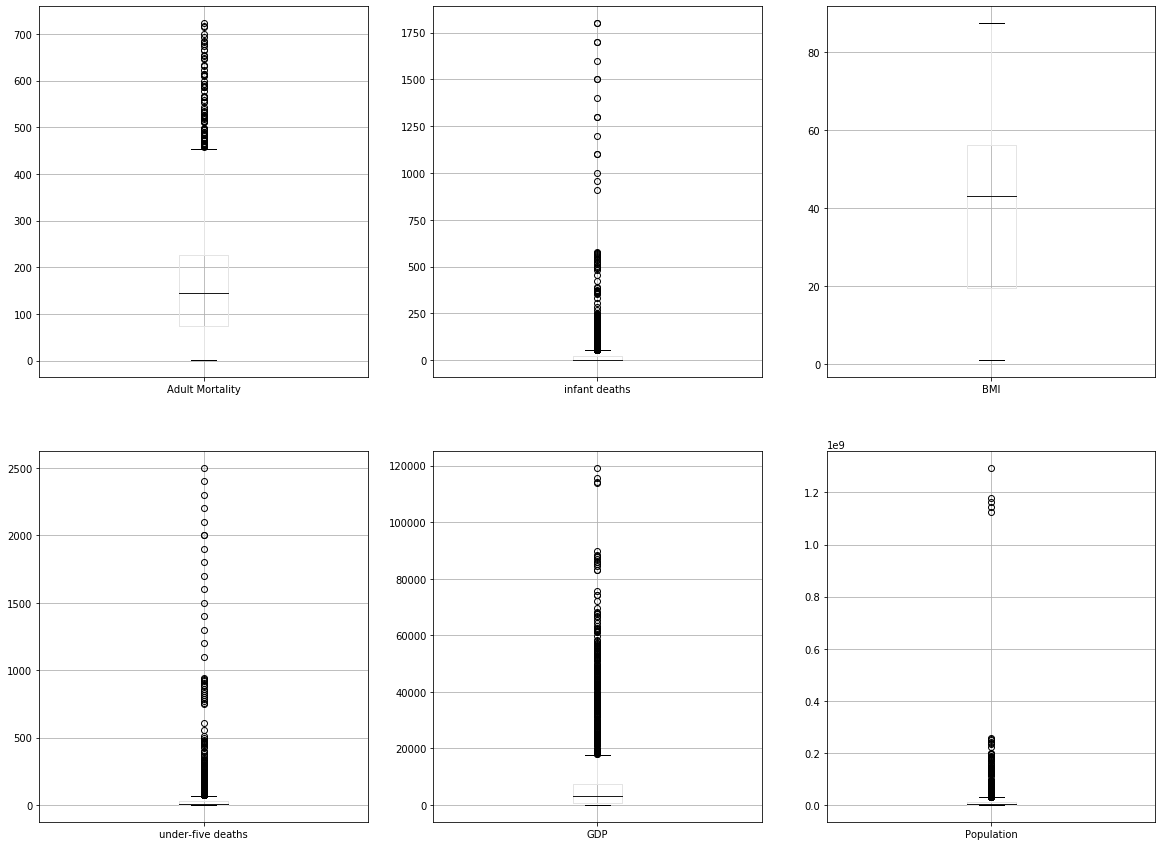

In [8]:
plt.figure(figsize=(20,15))

for i, col in enumerate(['Adult Mortality','infant deaths','BMI','under-five deaths','GDP','Population'], start=1):
    plt.subplot(2, 3, i)
    nulos_pela_media.boxplot(col)

### GRÁFICO DE BARRA
### O gráfico abaixo mostra a diminuição, ao longo dos anos, da média de mortes por HIV/AIDS a cada 1000 crianças entre 0-4 anos.

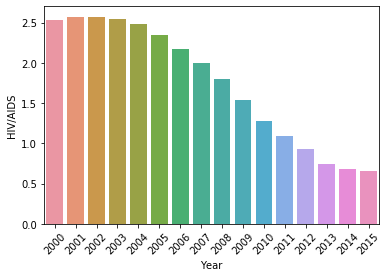

In [19]:
grafico_barras = sns.barplot(data=medias_ao_longo_dos_anos, y="HIV/AIDS", x="Year")
plt.xticks(rotation=45)
plt.show()

### GRÁFICO DE DISPERSÃO

### O gráfico abaixo mostra a forte correlação entre a média de anos que as pessoas passam na escola e o IDH (0-1) dos países.

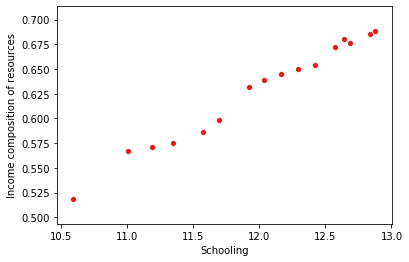

In [20]:
sns.scatterplot(data=medias_ao_longo_dos_anos, y="Income composition of resources", x="Schooling")

### Mapa de correlações

### Mapa que mostra o quão relacionadas estão duas variáveis ( Negativos: para variáveis anticorrelacionadas, 0 para nenhuma relação e 1 para variáveis totalmente relacionadas).

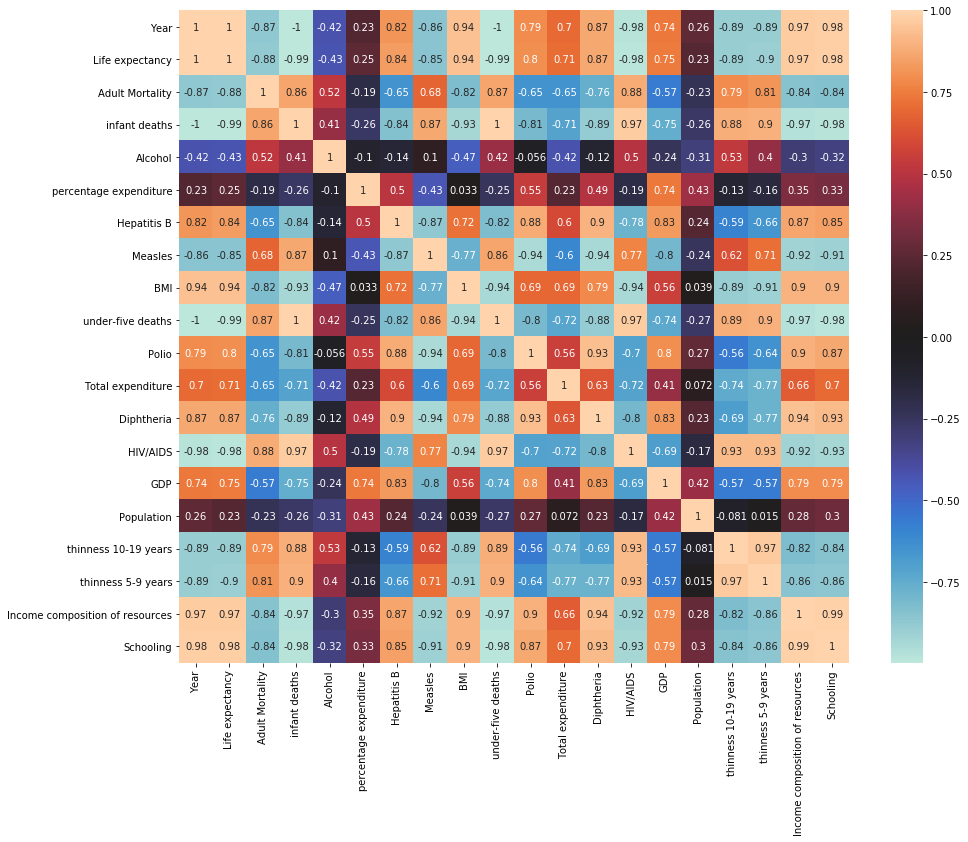

In [21]:
plt.figure(figsize=(15, 12))
sns.heatmap(medias_ao_longo_dos_anos.corr(),center=0,annot=True)

### HISTOGRAMAS UTILIZANDO DADOS DAS DOENÇAS

### Percebe-se que a cobertura de imunização, em porcentagem, é alta (mais de 1.600 vezes essa porcentagem foi entre 90 e 100% nos países do Dataset.

(array([1.720e+02, 1.000e+00, 1.000e+01, 2.600e+01, 7.000e+01, 8.500e+01,
        1.510e+02, 2.710e+02, 4.660e+02, 1.686e+03]),
 array([ 3. , 12.6, 22.2, 31.8, 41.4, 51. , 60.6, 70.2, 79.8, 89.4, 99. ]),
 <a list of 10 Patch objects>)

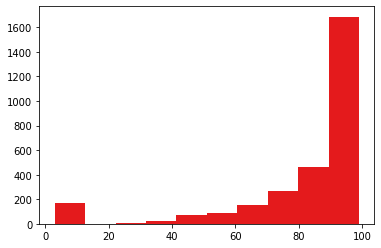

In [12]:
plt.hist(nulos_pela_media['Polio'])

### Na hepatite C, essa cobertura também é alta, com mais de 1.200 vezes a porcentagem entre 90 e 100%, novamente.

(array([ 159.,   16.,   22.,   21.,   56.,   48.,  142.,  202.,  956.,
        1316.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

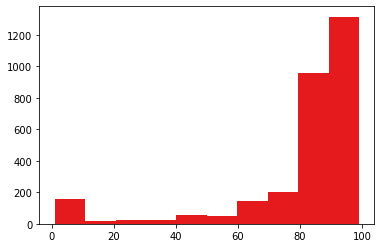

In [13]:
plt.hist(nulos_pela_media['Hepatitis B'])

### GRÁFICO DE LINHA

### É possível observar como a expectativa de vida se alterou globalmente ao longo dos anos

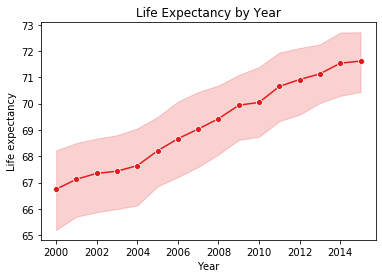

In [14]:
sns.lineplot(x='Year', y='Life expectancy', data=nulos_pela_media, marker='o')
plt.title('Life Expectancy by Year')
plt.show()

### Qual o nível de correlação entre os gastos do governo destinados à saúde e a expectativa de vida da sua população?

In [23]:
medias_ao_longo_dos_anos[["Total expenditure", "Life expectancy"]].corr()

,Total expenditure,Life expectancy
Total expenditure,1.000000,0.710377
Life expectancy,0.710377,1.000000


### Observa-se que a relação entre as variáveis está dentro do intervalo entre 0.6 - 0.8, ou seja, ela é considerada como forte.

### Mostrando a regressão linear dessas variáveis. 

In [201]:
from scipy.stats import linregress
result = linregress(nulos_pela_media["Life expectancy"], nulos_pela_media["Total expenditure"])
valor_a = result.slope
valor_b = result.intercept

In [208]:
import matplotlib.pyplot as plt

def gen_line(x_min, x_max, n_points, a, b):
    interval = x_max-x_min
    interval_value = interval/n_points
    
    x_result = []
    y_result = []

    for i in range(n_points):
        current_x = x_min+i*interval_value
        x_result.append(current_x)
        y_result.append(a*current_x + b)
        
    return x_result, y_result

def regressao(x, y, a, b):
    N = 100

    plt.scatter(x, y)

    line_1 = gen_line(min(x), max(x), N, a, b)
    plt.plot(line_1[0], line_1[1], c= "blue")

    plt.gca()
    plt.show()

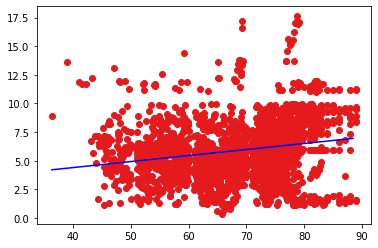

In [209]:
regressao(nulos_pela_media["Life expectancy"], nulos_pela_media["Total expenditure"], valor_a, valor_b)

### Fazendo o agrupamento das variáveis.

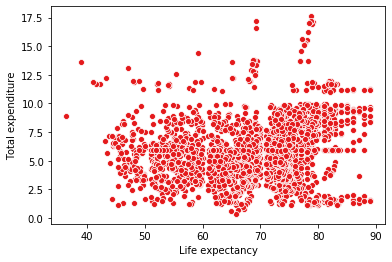

In [196]:
sns.scatterplot(data=nulos_pela_media, x="Life expectancy", y="Total expenditure")

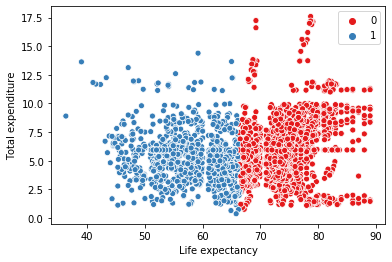

In [197]:
from sklearn.cluster import KMeans
df_group = nulos_pela_media[["Life expectancy", "Total expenditure"]]
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_group)
sns.scatterplot(data=nulos_pela_media, x="Life expectancy", y="Total expenditure", hue=kmeans.labels_)

### Quais os países com maior e menor cobertura de vacinação contra Poliomelite, Difteria e Hepatite B?

### Checando o maior valor para a cobertura de Poliomelite.

In [166]:
nulos_pela_media.loc[nulos_pela_media["Polio"].idxmax()]

Country                               Albania
Year                                     2015
Status                             Developing
Life expectancy                          77.8
Adult Mortality                            74
infant deaths                               0
Alcohol                                   4.6
percentage expenditure                364.975
Hepatitis B                                99
Measles                                     0
BMI                                        58
under-five deaths                           0
Polio                                      99
Total expenditure                           6
Diphtheria                                 99
HIV/AIDS                                  0.1
GDP                                   3954.23
Population                              28873
thinness 10-19 years                      1.2
thinness 5-9 years                        1.3
Income composition of resources         0.762
Schooling                         

### Fazendo o mesmo para Difteria.

In [167]:
nulos_pela_media.loc[nulos_pela_media["Diphtheria"].idxmax()]

Country                               Albania
Year                                     2015
Status                             Developing
Life expectancy                          77.8
Adult Mortality                            74
infant deaths                               0
Alcohol                                   4.6
percentage expenditure                364.975
Hepatitis B                                99
Measles                                     0
BMI                                        58
under-five deaths                           0
Polio                                      99
Total expenditure                           6
Diphtheria                                 99
HIV/AIDS                                  0.1
GDP                                   3954.23
Population                              28873
thinness 10-19 years                      1.2
thinness 5-9 years                        1.3
Income composition of resources         0.762
Schooling                         

### Agora para Hepatite B.

In [168]:
nulos_pela_media.loc[nulos_pela_media["Hepatitis B"].idxmax()]

Country                               Albania
Year                                     2015
Status                             Developing
Life expectancy                          77.8
Adult Mortality                            74
infant deaths                               0
Alcohol                                   4.6
percentage expenditure                364.975
Hepatitis B                                99
Measles                                     0
BMI                                        58
under-five deaths                           0
Polio                                      99
Total expenditure                           6
Diphtheria                                 99
HIV/AIDS                                  0.1
GDP                                   3954.23
Population                              28873
thinness 10-19 years                      1.2
thinness 5-9 years                        1.3
Income composition of resources         0.762
Schooling                         

### Nota-se que o maior percentual de cobetura das 3 doenças é de 99%. Porém, há vários países que possuem essa marca, então os passamos para um lista, respondendo assim, a pergunta. O processo será repetido para as outras doenças

In [99]:
polio_vacinacao = nulos_pela_media.loc[nulos_pela_media["Polio"] == 99]
lista = polio_vacinacao["Country"].to_list()
def remove_repetidos(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    l.sort()
    return l

lista = remove_repetidos(lista)
print (lista)

['Albania', 'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Bahrain', 'Belarus', 'Belgium', 'Bolivia (Plurinational State of)', 'Brazil', 'Brunei Darussalam', 'Cabo Verde', 'Canada', 'China', 'Cuba', 'Cyprus', 'Czechia', "Democratic People's Republic of Korea", 'Egypt', 'El Salvador', 'Fiji', 'Finland', 'France', 'Greece', 'Grenada', 'Honduras', 'Hungary', 'Iceland', 'Iran (Islamic Republic of)', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Luxembourg', 'Malawi', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Monaco', 'Mongolia', 'Morocco', 'Nicaragua', 'Niue', 'Oman', 'Palau', 'Panama', 'Poland', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Sao Tome and Principe', 'Seychelles', 'Slovakia', 'Solomon Islands', 'Spain', 'Sri Lanka', 'Sweden', 'Thailand', 'Tunisia', 'Turkmenistan', 'Ukraine', 'United Arab Emirates', 'Uzbekistan']


### Fazendo o mesmo para Difteria e Hepatite B

In [107]:
difteria_vacinacao = nulos_pela_media.loc[nulos_pela_media["Diphtheria"] == 99]
lista_difteria = difteria_vacinacao["Country"].to_list()
def remove_repetidos(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    l.sort()
    return l

lista_difteria = remove_repetidos(lista)
print (lista_difteria)

['Albania', 'Antigua and Barbuda', 'Bahrain', 'Belarus', 'Bhutan', 'Bolivia (Plurinational State of)', 'Brazil', 'Brunei Darussalam', 'Burundi', 'China', 'Cuba', 'Czechia', 'Egypt', 'El Salvador', 'Fiji', 'Grenada', 'Iran (Islamic Republic of)', 'Israel', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Libya', 'Malawi', 'Malaysia', 'Maldives', 'Mauritius', 'Mexico', 'Monaco', 'Mongolia', 'Morocco', 'Niue', 'Oman', 'Palau', 'Poland', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Sao Tome and Principe', 'Serbia', 'Seychelles', 'Slovakia', 'Solomon Islands', 'Sri Lanka', 'Thailand', 'Tunisia', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan']


In [106]:
hepatite_vacinacao = nulos_pela_media.loc[nulos_pela_media["Hepatitis B"] == 99]
lista = hepatite_vacinacao["Country"].to_list()
def remove_repetidos(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    l.sort()
    return l

lista_hepatite = remove_repetidos(lista)
print (lista_hepatite)

['Albania', 'Antigua and Barbuda', 'Bahrain', 'Belarus', 'Bhutan', 'Bolivia (Plurinational State of)', 'Brazil', 'Brunei Darussalam', 'Burundi', 'China', 'Cuba', 'Czechia', 'Egypt', 'El Salvador', 'Fiji', 'Grenada', 'Iran (Islamic Republic of)', 'Israel', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Libya', 'Malawi', 'Malaysia', 'Maldives', 'Mauritius', 'Mexico', 'Monaco', 'Mongolia', 'Morocco', 'Niue', 'Oman', 'Palau', 'Poland', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Sao Tome and Principe', 'Serbia', 'Seychelles', 'Slovakia', 'Solomon Islands', 'Sri Lanka', 'Thailand', 'Tunisia', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan']


In [108]:
polio_vacinacao = nulos_pela_media.loc[nulos_pela_media["Polio"] == 99]
lista = polio_vacinacao["Country"].to_list()
def remove_repetidos(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    l.sort()
    return l

lista_polio = remove_repetidos(lista)
print (lista_polio)

['Albania', 'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Bahrain', 'Belarus', 'Belgium', 'Bolivia (Plurinational State of)', 'Brazil', 'Brunei Darussalam', 'Cabo Verde', 'Canada', 'China', 'Cuba', 'Cyprus', 'Czechia', "Democratic People's Republic of Korea", 'Egypt', 'El Salvador', 'Fiji', 'Finland', 'France', 'Greece', 'Grenada', 'Honduras', 'Hungary', 'Iceland', 'Iran (Islamic Republic of)', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Luxembourg', 'Malawi', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Monaco', 'Mongolia', 'Morocco', 'Nicaragua', 'Niue', 'Oman', 'Palau', 'Panama', 'Poland', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Sao Tome and Principe', 'Seychelles', 'Slovakia', 'Solomon Islands', 'Spain', 'Sri Lanka', 'Sweden', 'Thailand', 'Tunisia', 'Turkmenistan', 'Ukraine', 'United Arab Emirates', 'Uzbekistan']


### Repetindo o mesmo processo para achar os países com a menor cobertura.

In [153]:
nulos_pela_media.loc[nulos_pela_media["Polio"].idxmin()]

Country                                 Angola
Year                                      2000
Status                              Developing
Life expectancy                           45.3
Adult Mortality                             48
infant deaths                               97
Alcohol                                   1.85
percentage expenditure                 15.8815
Hepatitis B                            80.9405
Measles                                   2219
BMI                                       15.4
under-five deaths                          160
Polio                                        3
Total expenditure                         2.79
Diphtheria                                  28
HIV/AIDS                                     2
GDP                                    555.297
Population                         1.64492e+06
thinness 10-19 years                       1.9
thinness 5-9 years                         1.9
Income composition of resources          0.382
Schooling    

In [161]:
nulos_pela_media.loc[nulos_pela_media["Diphtheria"].idxmin()]

Country                            Equatorial Guinea
Year                                            2014
Status                                    Developing
Life expectancy                                 57.9
Adult Mortality                                   32
infant deaths                                      3
Alcohol                                         0.01
percentage expenditure                       13.4048
Hepatitis B                                        2
Measles                                           13
BMI                                               24
under-five deaths                                  4
Polio                                             24
Total expenditure                                3.8
Diphtheria                                         2
HIV/AIDS                                         4.4
GDP                                          192.597
Population                               1.12942e+06
thinness 10-19 years                          

In [169]:
nulos_pela_media.loc[nulos_pela_media["Hepatitis B"].idxmin()]

Country                            Côte d'Ivoire
Year                                        2001
Status                                Developing
Life expectancy                             47.8
Adult Mortality                              467
infant deaths                                 65
Alcohol                                     3.15
percentage expenditure                         0
Hepatitis B                                    1
Measles                                     5790
BMI                                         19.9
under-five deaths                             94
Polio                                          7
Total expenditure                           4.85
Diphtheria                                    66
HIV/AIDS                                       7
GDP                                      7483.16
Population                           1.27534e+07
thinness 10-19 years                         7.9
thinness 5-9 years                           7.9
Income composition o

### Nota-se que a menor cobertura de vacinação para Poliomelite é de 3%, Difteria de 2% e Hepatite B de 1%. Vejamos se há outros países com o mesmo percentual das respectivas doenças.

In [157]:
polio_vacinacao_min = nulos_pela_media.loc[nulos_pela_media["Polio"] <= 3]
lista = polio_vacinacao_min["Country"].to_list()
def remove_repetidos(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    l.sort()
    return l

lista_polio_min = remove_repetidos(lista)
print (lista_polio_min)

['Angola', 'Chad', 'Democratic Republic of the Congo', 'Equatorial Guinea', 'Somalia']


In [170]:
difteria_vacinacao_min = nulos_pela_media.loc[nulos_pela_media["Diphtheria"] <= 2]
lista = difteria_vacinacao_min["Country"].to_list()
def remove_repetidos(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    l.sort()
    return l

lista_difteria_min = remove_repetidos(lista)
print (lista_difteria_min)

['Equatorial Guinea']


In [171]:
hepatite_vacinacao_min = nulos_pela_media.loc[nulos_pela_media["Hepatitis B"] <= 1]
lista = hepatite_vacinacao_min["Country"].to_list()
def remove_repetidos(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    l.sort()
    return l

lista_hepatite_min = remove_repetidos(lista)
print (lista_hepatite_min)

["Côte d'Ivoire"]
